# Layer Explaination

In [28]:
import tensorflow as tf
print(tf.__version__)

2.7.0


## Input Image  
Input으로 들어갈 DataSet을 들여다보면서 시각화까지

패키지 로드  
- os
- glob
- matplotlib

In [2]:
import os

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from tensorflow.keras import datasets

(train_x, train_y), (test_x, test_y) = datasets.mnist.load_data()

In [4]:
image = train_x[0]

이미지의 shape을 확인한다.

In [5]:
# 이미지 shape 확인
image.shape

(28, 28)

In [6]:
# 차원 수 높이기 
# batch_size, width, height, channel
image = image[tf.newaxis, ..., tf.newaxis]
image.shape

(1, 28, 28, 1)

# Feature Extraction

![image.png](../assets/CNN_1.jpg)

## Convolution

![image.png](../assets/CNN_2.gif)

![IMG](../assets/CNN_3.jpg)

* filters: layer에서 나갈 때 몇 개의 filter를 만들 것인지 (a.k.a weights, filters, channels)  
* kernel_size: filter(Weight)의 사이즈  
* strides: 몇 개의 pixel을 skip 하면서 훑어지나갈 것인지 (사이즈에도 영향을 줌)  
* padding: zero padding을 만들 것인지. VALID는 Padding이 없고, SAME은 Padding이 있음 (사이즈에도 영향을 줌)  
* activation: Activation Function을 만들것인지. 당장 설정 안해도 Layer층을 따로 만들 수 있음

In [7]:
tf.keras.layers.Conv2D(filters=1, kernel_size=(3, 3), strides=(1, 1), 
                       padding='VALID', activation='relu')

(3, 3) 대신에 3으로도 대체 가능

In [8]:
tf.keras.layers.Conv2D(filters=1, kernel_size=3, strides=(1, 1), padding='VALID', activation='relu')

### Visualization

- tf.keras.layers.Conv2D

In [9]:
image = tf.cast(image, dtype=tf.float32)

In [25]:
layer = tf.keras.layers.Conv2D(1, 3, strides=(2,2), padding='same')
output = layer(image)

In [26]:
image.shape

TensorShape([1, 28, 28, 1])

In [27]:
output.shape

TensorShape([1, 14, 14, 1])

weight 불러오기

- layer.get_weights()

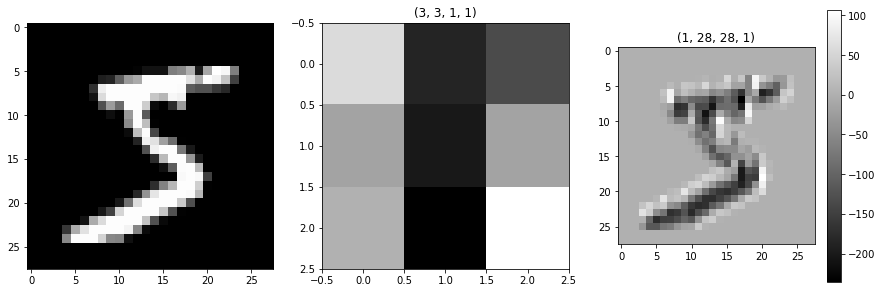

In [11]:
weight = layer.get_weights()[0]

plt.figure(figsize=(15, 5))
plt.subplot(131)
#plt.hist(output.numpy().ravel(), range=[-2,2])
#plt.ylim(0, 500)
plt.imshow(image[0,:,:,0], 'gray')

plt.subplot(132)
plt.title(weight.shape)
plt.imshow(weight[:,:,0,0], 'gray')

plt.subplot(133)
plt.title(output.shape)
plt.imshow(output[0, :, :, 0], 'gray')
plt.colorbar()

plt.show()

## Activation Function

In [12]:
# out = tf.keras.layers.Conv2D(3, 3, strides=(1, 1), padding='SAME')(out)
layer = tf.keras.layers.ReLU()
output_relu = layer(output)

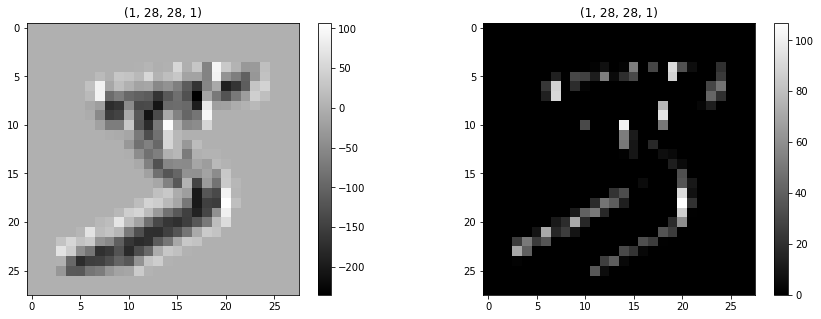

In [13]:
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.title(output.shape)
plt.imshow(output[0, :, :, 0], 'gray')
plt.colorbar()

plt.subplot(122)
plt.title(output_relu.shape)
plt.imshow(output_relu[0, :, :, 0], 'gray')
plt.colorbar()
plt.show()

## Pooling

![image.png](https://miro.medium.com/max/707/1*UbjtZxhx5Z1HEsW-49cDeQ.jpeg)

- tf.keras.layers.MaxPool2D

In [14]:
tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding='SAME')

In [15]:
layer = tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding='SAME')
output_pool = layer(output_relu)

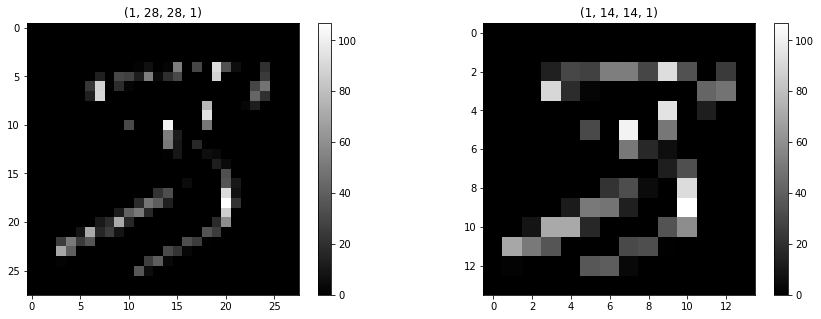

In [16]:
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.title(output_relu.shape)
plt.imshow(output_relu[0, :, :, 0], 'gray')
plt.colorbar()

plt.subplot(122)
plt.title(output_pool.shape)
plt.imshow(output_pool[0, :, :, 0], 'gray')
plt.colorbar()
plt.show()

# Fully Connected

![image.png](https://miro.medium.com/max/872/1*vDRsPt3ooEI2HOXaRGp39Q.jpeg)

## Flatten

![image.png](https://sds-platform-private.s3-us-east-2.amazonaws.com/uploads/73_blog_image_1.png)

- tf.keras.layers.Flatten()

In [17]:
tf.keras.layers.Flatten()

In [18]:
layer = tf.keras.layers.Flatten()
output_flatten = layer(output_pool)

print(output_flatten.shape)  # 1 * 14 * 14 * 1 = 196

(1, 196)
